
# Project: Investigate a Dataset - No-show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The focus of this investigation is the characteristics of patients who kept hospital appointments. This No-show dataset from Kaggle provides the details of 100k medical appointments in Brazil. Specifically, the data holds information about the hospital where patients scheduled appointments, demographic and health data of the patients, and whether or not they kept their appointments.

My analyses are focussed on the dependent variables: patient ID, or appointment_ID, in order to predict which type of patient shows up at their hospital appointments. 

I will look at missed appointments by length of time between scheduling and appointment

I investigate patient demographic features like  hospital and age group.

I also examine patient health factors. 

Can I predict what type of person is most likely to keep an appointment?

### It will be very useful for your readers if you expand the introduction to discuss the analysis that you intend to implement.

Here are the column names and a brief description of each:

- PatientId: A unique ID for each patient</li>
- AppointmentID: A unique ID for each appointment</li>
- ScheduledDay: The day the patient made their appointment</li>
- AppointmentDay: The day of the appointment</li>
- Gender, Age: patient demographic information</li>
- Neighbourhood: The location of the hospital</li>
- Scholarship:  ‘Yes’ denotes that the patient is using Brasilian government assistance (Bolsa Família)</li>
- Hipertension, Diabetes, Alcoholism, Handcap: health factors. Presumably ‘Handcap’ refers to disability status</li>
- SMS_received: Whether the patient received a text reminder.</li>
- No-show: Whether the patient missed an appointment (Yes) or kept an appointment (No)</li>

In [1]:
# import statements

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
import seaborn as sb
pd.options.mode.chained_assignment = None  # Apparently this helps me with all my renaming issues

# 'magic word'
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

The No-show data comes from Kaggle and is provided by Udacity. Here are the first few rows of data, and the total number of rows and columns.

In [2]:
# data from Kaggle and Udacity: noshowappointments-kagglev2-may-2016.csv
# df = pd.read_csv('/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
# df.head()
# error: dataset too large

# Important Please add markdown cells (instead of the comments inside the code)
# to describe each step of the wrangling section.

# use dask
df_dd = dd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv", assume_missing=True)
df_dd.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


df = pd.read_csv('/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()
error: dataset too large

Important Please add markdown cells (instead of the comments inside the code)
to describe each step of the wrangling section.

use dask

In [3]:
# Important Please add markdown cells (instead of the comments inside the code)
# to describe each step of the wrangling section.
# change the dataframe type to continue using pandas
df = df_dd.compute()

change the dataframe type to continue using pandas
df = df_dd.compute()

Here is a overview of the data:

In [4]:
# quick overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null float64
Hipertension      110527 non-null float64
Diabetes          110527 non-null float64
Alcoholism        110527 non-null float64
Handcap           110527 non-null float64
SMS_received      110527 non-null float64
No-show           110527 non-null object
dtypes: float64(9), object(5)
memory usage: 11.8+ MB


In [5]:
# Important Please add markdown cells (instead of the comments inside the code)
# to describe each step of the wrangling section.
# look for duplicated rows

In [6]:
d = sum(df.duplicated())
print('There are', d, 'duplicated rows.')

There are 0 duplicated rows.


In [7]:
# Important Please add markdown cells (instead of the comments inside the code)
# to describe each step of the wrangling section.
# look for duplicates where none should be

In [8]:
s = sum(df['AppointmentID'].duplicated())
print('Appointment IDs are duplicated', s, 'times.')

Appointment IDs are duplicated 0 times.


Some column names and datatypes need to be changed.

First, ScheduledDay and AppointmentDay are 'object' datatypes. I changed these to date. Also, I removed appointments that were scheduled after they occurred.

In [9]:
# change day columns to datetime type
df[['ScheduledDay', 'AppointmentDay']] = df[['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)
df['ScheduledDate'] = df['ScheduledDay'].dt.date
df['AppointmentDate'] = df['AppointmentDay'].dt.date

# drop any appointments that were scheduled after the appointment date
df = df.loc[df['ScheduledDate'] <= df['AppointmentDate']]

Important Please add markdown cells (instead of the comments inside the code)
to describe each step of the wrangling section.

get the difference in time between scheduling and the appointment date
df['Time_Difference'] = (df.AppointmentDate - df.ScheduledDate).astype('timedelta64[D]')

#get rid of NaN
df['Time_Difference'] = df['Time_Difference'].replace('NaN', 0)

In [10]:
# Important Please add markdown cells (instead of the comments inside the code)
# to describe each step of the wrangling section.

# get the difference in time between scheduling and the appointment date
df['Time_Difference'] = (df.AppointmentDate - df.ScheduledDate).astype('timedelta64[D]')

#get rid of NaN
df['Time_Difference'] = df['Time_Difference'].replace('NaN', 0)

Next, the No-show column and values are changed to be less confusing. In the original data, a 'no' in the 'No-show' column indicates a kept appointment and a 'Yes' indicates a missed appointment. A 'yes' in a row about appointments indicating that the appointment was kept is clearer.

In [11]:
# Important Please add markdown cells (instead of the comments inside the code)
# to describe each step of the wrangling section.

# make attendance make sense
df['No-show'] = df['No-show'].replace(['No'],'hold')

# if no-show is yes, they didn't show up and the value should be attendance = 0
df['No-show'] = df['No-show'].replace(['Yes'],'0')

# if no-show is no, they did show up and the value should be attendance = 1
df['No-show'] = df['No-show'].replace(['hold'],'1')

The different capitalisation between PatientId and AppointmentID is confusing. Those column headers are changed. Also, the values for PatientId and AppointmentID are too long for easy reading.

Hypertension is spelled as 'hipertension': that has been changed.  As column headers, 'Disability' is preferrable to 'Handcap' and 'Assistance' is clearer than 'Scholarship'. 'Neighbourhood' refers to the location of the hospital, so that has been changed to 'Hospital'. Also, underscores were added where a space would naturally go to make the headers easier to read.

In [12]:
# change column headings
df = df.rename(columns = {'AppointmentID': 'Appointment_ID',
                          'PatientId': 'Patient_ID',
                          'AppointmentDay': 'Appointment_Day',
                          'ScheduledDay': 'Scheduled_Day',
                          'Scholarship': 'Assistance',
                          'Neighbourhood': 'Hospital',
                          'Hipertension': 'Hypertension',
                          'Handcap': 'Disability',
                          'No-show': 'Attendance'})

In [13]:
df_keep = df
df_throw_away = df

# make a df 'throw_away' where all columns are changed to numbers(thanks ngroup)
for column in ['Appointment_ID','Hospital','Patient_ID', 'Alcoholism', 'Disability', 'Hypertension', 'Diabetes', 'Assistance', 'Gender']:
         df_throw_away[column] = df_throw_away.groupby(column).ngroup()

# make a df 'keep' change values to not scientific numbers, also + 1 (I don't want a zero)
for column in ['Appointment_ID','Hospital','Patient_ID']:
         df_keep[column] = df_keep.groupby(column).ngroup() + 1
    
# change regular df to be like keep (not scientific numbers)
df_appointments = df_keep

x = df_appointments.shape
print(x)

(110522, 17)


df_keep = df
df_throw_away = df

#make a df 'throw_away' where all columns are changed to numbers(thanks ngroup)
for column in ['Appointment_ID','Hospital','Patient_ID', 'Alcoholism', 'Disability', 'Hypertension', 'Diabetes', 'Assistance', 'Gender']:
         df_throw_away[column] = df_throw_away.groupby(column).ngroup()

make a df 'keep' change values to not scientific numbers, also + 1 (I don't want a zero)
for column in ['Appointment_ID','Hospital','Patient_ID']:
         df_keep[column] = df_keep.groupby(column).ngroup() + 1
    
change regular df to be like keep (not scientific numbers)
df_appointments = df_keep

x = df_appointments.shape
print(x)

Patient IDs are needlessly in scientific notation. The patient ids need to be unique, but their actual value is probably irrelevant. As they were randomly assigned, I changed them to integers.

The values for Appointment IDs and for Neighbourhoods are changed to numerical, for ease of reading.

Some patients have multiple appointments. It would make more sense to combine each patient's appointments by attendance. That way, each patient is represented once. If we need information about individual appointments, we can use the df_appointments dataframe for analysis. 

What if a patient had a summer birthday?

In [14]:
# patient has 2 ages, use throw-away because values are all numbers and
# use getvaluecounts because this is what it is for
# for x in patient_id, 
#     get value_counts for Age
#     if > 2, print?

# make a better value counter

# make a value counter/printer because will use it more than once
def getvaluecounts(df, column_1, column_2):
    x = column_1
    y = column_2
    count = df.groupby([x, y]).count()
    return(count)

# pandas.cut: This allows you to easily cut continuous variables into segments. 
#    https://pandas.pydata.org/docs/reference/api/pandas.cut.html

x = getvaluecounts(df_throw_away, df_throw_away['Patient_ID'], df_throw_away
['Age'])

'''
i assume first birthday value is kept but it's only a one-year difference 
so i'm not going to worry about it
but i wanted to make sure other values like disability or alcoholism didn't change
i just looked at this data i didn't actually find a way to find out with code unf.
'''

# Long Tables
# Please avoid including very long tables in the report, it distracts 
# your readers from the main objective of the report. 
# Instead consider using summary statistics or .info() or .describe().

"\ni assume first birthday value is kept but it's only a one-year difference \nso i'm not going to worry about it\nbut i wanted to make sure other values like disability or alcoholism didn't change\ni just looked at this data i didn't actually find a way to find out with code unf.\n"

Some patients have 2 ages, birthdays happen.

I added a column for a count of patient ids, representing repeat appointments scheduled, a column of attendance sum, representing attended appointments, and attendance ratio, the ratio for each patient of scheduled appointments to attended appointments. These ratios run from zero (no scheduled appointments were kept) to one (all scheduled appointments were kept).

In [15]:
# look for duplicates of patient id
# there probably are some because people make more than one appointment sometimes
df_freq = df_appointments

# make a frequency column
df_freq['Frequency'] = df_freq.groupby('Patient_ID')['Patient_ID'].transform('count')

# make sure attendance is a number
df_freq["Attendance"] = df_freq["Attendance"].astype(str).astype(int)

# get number of appointments per patient
df_freq['Attendance_Sum'] = df_freq.groupby('Patient_ID')['Attendance'].transform('sum')

# get an ratio of total appointments kept divided by total appointments made
df_freq['Attendance_Ratio'] = df_freq['Attendance_Sum']/df_freq['Frequency']

# make sure there are no 'inf' values, why aren't they just zero?
df_freq = df_freq.drop_duplicates(subset=['Patient_ID'])

df_patients = df_freq

look for outliers on box plot.
df_appointments.boxplot('Age')
df_patients.boxplot('Age')

The charts in the report should be clear and easy to interpret. 
please add the x and the y axis for each chart, please add a descriptive title for each chart. 
Please add a short discussion under each chart explaining what the chart depicts and your insight.

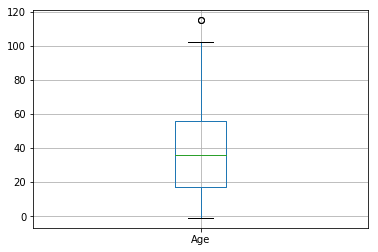

In [16]:
# look for outliers on box plot.
# df_appointments.boxplot('Age')
df_patients.boxplot('Age')


# The charts in the report should be clear and easy to interpret. 
# please add the x and the y axis for each chart, please add a descriptive title for each chart. 
# Please add a short discussion under each chart explaining what the chart depicts and your insight.

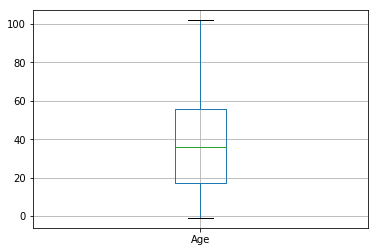

In [17]:
# get the mean and the standard deviation using numpy
df_patients_mean, df_patients_std = np.mean(df_patients), np.std(df_patients)

# identify ages beyond the standard deviation
outside_the_box = df_patients_std * 3
lowest, highest = df_patients_mean - outside_the_box, df_patients_mean + outside_the_box
# make a df that only has ages in the box
df_patients.drop(df_patients[df_patients['Age'] > highest['Age']].index, inplace = True)
df_patients.drop(df_patients[df_patients['Age'] < lowest['Age']].index, inplace = True)
df_patients.boxplot('Age')

# The charts in the report should be clear and easy to interpret. 
# please add the x and the y axis for each chart, please add a descriptive title for each chart. 
# Please add a short discussion under each chart explaining what the chart depicts and your insight.

I removed the patient outliers by age. Here is a boxplot representing the age column, and a second with the outliers removed.

The data is cleaned. Here are the first five rows:

In [18]:
# make the df name shorter
df = df_patients

# take a peek
df.head(5)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Hospital,Assistance,Hypertension,Diabetes,Alcoholism,Disability,SMS_received,Attendance,ScheduledDate,AppointmentDate,Time_Difference,Frequency,Attendance_Sum,Attendance_Ratio
0,30846,29333,0,2016-04-29 18:38:08,2016-04-29,62.0,40,0,1,0,0,0,0.0,1,2016-04-29,2016-04-29,0.0,2,2,1.0
1,55326,29080,1,2016-04-29 16:08:27,2016-04-29,56.0,40,0,0,0,0,0,0.0,1,2016-04-29,2016-04-29,0.0,2,2,1.0
2,15723,29116,0,2016-04-29 16:19:04,2016-04-29,62.0,46,0,0,0,0,0,0.0,1,2016-04-29,2016-04-29,0.0,2,2,1.0
3,9019,29300,0,2016-04-29 17:29:31,2016-04-29,8.0,55,0,0,0,0,0,0.0,1,2016-04-29,2016-04-29,0.0,2,1,0.5
4,23942,29074,0,2016-04-29 16:07:23,2016-04-29,56.0,40,0,1,1,0,0,0.0,1,2016-04-29,2016-04-29,0.0,1,1,1.0


Column headers were changed to be more clear. Datatypes were changed for easier reading and analysis. Also, columns with two values are now numerical (gender and attendance), and some outliers were removed. Patient records were collapsed into one row, with their attendance ratio and frequency of visits.

The data is now ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis
The first part of this investigation is an analysis of the appointments.

First, I compare information about the missed appointments to kept appointments. I look at time factors such as length of time between scheduling and appointment or day of the week of the appointment, then by hospital.

Finally, I compare the hospitals where the appointments are missed to those where appointments are kept. I compare them by health factors, for example, I compare the missed appointments at hospitals that cater to patients with diabetes to those those that cater to alcoholics. I also compare the hospitals on the age, assistance, and disablity level of their patients.

### Which appointments are being missed? Appointment Questions Analysis

I wondered if same day appointments were missed at a different rate, because presumably they were urgent. 

Text(0,0.5,'Number of Patients')

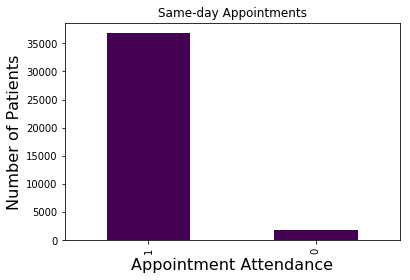

In [19]:
# get a df of appointments made on the same day they were scheduled
df_same_day_appointments = df_appointments.loc[df_appointments['ScheduledDate'] == df_appointments['AppointmentDate']] 

# show the bar chart
df_same_day_appointments['Attendance'].value_counts().plot(kind='bar', title = 'Same-day Appointments', cmap = 'viridis')
plt.xlabel('Appointment Attendance', fontsize = 16)
plt.ylabel('Number of Patients', fontsize = 16)

The chart above depicts the attendance (1 means attended appointment, 0 means missed appointment) of the patients in the dataset, for appointments scheduled on the **same day** as the appointment date.

Text(0,0.5,'Number of Patients')

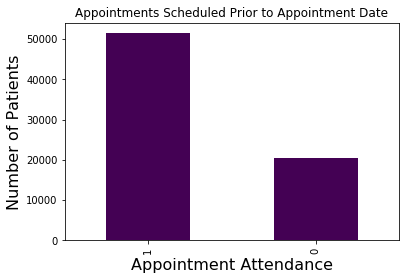

In [20]:
# get a df of appointments made on a different day than they were scheduled
df_not_same_day_appointment = df_appointments.loc[df_appointments['ScheduledDate'] != df_appointments['AppointmentDate']] 

# show the bar chart
df_not_same_day_appointment['Attendance'].value_counts().plot(kind='bar', title = 'Appointments Scheduled Prior to Appointment Date', cmap = 'viridis')
plt.xlabel('Appointment Attendance', fontsize = 16)
plt.ylabel('Number of Patients', fontsize = 16)

The chart above depicts the attendance (1 means attended appointment, 0 means missed appointment) of the patients in the dataset, for appointments scheduled **in advance** of the appointment date.

Absolutely, same-day appointments have a better attendance rate than appointments scheduled in advance. 

Anyone might have a reason for an urgent appointment and it is unlikely they would skip it. The most likely patient to keep an appointment will have a same-day appointment. This is common sense.

The longer the length of time between scheduling an appointment and the appointment date, the more likely it was that the appointment was missed.

In [ ]:
# get attendance and time difference of all the appointments
df_at = pd.DataFrame(df_appointments,columns=['Attendance','Time_Difference'])

# find the mean time difference in days between attended vs missed
# df_at.groupby('Attendance').describe(include = 'all')

'''
While the .describe() function provides you with the distribution 
of the numerical features (single variable exploration). 
Using visualization to examine each feature which is more informative 
and will help you understand the data much better. 
You can use a simple histogram (continuous features) or barplot ( categorical features).
'''

df_at.groupby('Attendance').plot(kind = 'bar')

If the time between scheduling and appointment date is about 9 days or less, appointments were more often kept than not. However, if the time between scheduling and appointment date was any longer, the appointments were more often missed.

Removing same day appointments, the mean length of time by attendance has less of a disparity.

In [ ]:
# get attendance and time difference of all the appointments after removing same day appts
df_nsd = pd.DataFrame(df_not_same_day_appointment,columns=['Attendance','Time_Difference'])

# find the mean time difference in days between attended vs missed
df_nsd.groupby('Attendance').describe(include = 'all')

# While the .describe() function provides you with the distribution 
# of the numerical features (single variable exploration). 
# Using visualization to examine each feature which is more informative 
# and will help you understand the data much better. 
# You can use a simple histogram (continuous features) or barplot ( categorical features).


The mean length of time between scheduling date and appointment date for missed appointments is approximately 17 days. For the appointments that were kept, the mean is about 15 days.

The day of the week of the appointment affected whether or not someone attended their appointment. The correlation between day of the week and attendance is:

In [ ]:
def getcorr(df, column_1, column_2): # get the correlation of 2 values from a df and print them out
    x = column_1
    y = column_2
    corr = x.corr(y)
    corr2 = corr.round(2)
    print('The correlation is', corr2)

In [ ]:
df_days = df_appointments.reset_index()
df_days['Day_of_Week'] = df_appointments['Appointment_Day'].dt.dayofweek
df_d = pd.DataFrame(df_days,columns=['Day_of_Week','Attendance'])

getcorr(df_days, df_days['Day_of_Week'], df_days['Attendance'])

In [ ]:
df_d.groupby('Day_of_Week').describe(include = 'all')


# While the .describe() function provides you with the distribution 
# of the numerical features (single variable exploration). 
# Using visualization to examine each feature which is more informative 
# and will help you understand the data much better. 
# You can use a simple histogram (continuous features) or barplot ( categorical features).


The correlation between the day of the week that the appointment falls on and whether or not a patient kept that appointment is weak. Thursday appointments were marginally better attended than others, but the correlation is very poor.

The appointment factors are whether or not the appointment was for the same day it was scheduled, and the length of time between being scheduled and being kept, but not really the day of the week the appointment was for.

### Whose appointments are being missed? Demographic questions analysis

Certain demographic groups might be more likely to miss appointments.

The mean age of those who keep or miss appointments seems about the same.

In [ ]:
df_ma = pd.DataFrame(df,columns=['Attendance','Age'])

df_ma.groupby('Attendance').describe(include = 'all')


# While the .describe() function provides you with the distribution 
# of the numerical features (single variable exploration). 
# Using visualization to examine each feature which is more informative 
# and will help you understand the data much better. 
# You can use a simple histogram (continuous features) or barplot ( categorical features).


These means are skewed by the number of babies in the data. However, at a glance, the babies are clearly both numerous and dependable. 

In [ ]:
df_sample_a = df.sample(n=9000)

aa = pd.crosstab(df_sample_a.Age, df_sample_a.Attendance).plot(kind='bar', cmap = 'cool')
aa.legend(title='Attendance')

# Most of the charts are well done so I only have few comments here.

# For the chart here below, the x-axis ticks are not readable. 

# Please use a histogram instead of a bar plot. 

# Another option is to increase the size of the figure till the 

# text is readable. as a general comment here, please make sure 

# that all the text that appears on a figure is readable.

# Examp_1.jpg


# The charts in the report should be clear and easy to interpret. 
# please add the x and the y axis for each chart, please add a descriptive title for each chart. 
# Please add a short discussion under each chart explaining what the chart depicts and your insight.

So many babies are keeping their appointments. 

Look at appointment ratios correlated to attenders vs missers. These are individual patients: they are either attenders (attended more than 75% of their appointments, or missers, missed more than 25% of their appointments.

In [ ]:
# use a sample this is taking ages
df_sample_p = df.sample(n=9000)
df_keepers = df_sample_p.loc[df_sample_p['Attendance_Ratio'] > 0.75]
df_missers = df_sample_p.loc[df_sample_p['Attendance_Ratio'] < 0.25]

x = getcorr(df_keepers, df_keepers['Attendance_Ratio'],df_keepers['Age'])
y = getcorr(df_missers, df_missers['Attendance_Ratio'],df_missers['Age'])

The correlations are weak, but missers are younger on average than attenders.

The location of the hospital is correlated to attendance at appointments. There are about 80 hospitals. The colour indicates attendance ratio: yellower means higher attendance.

In [ ]:
# this gets really crowded so use a sample to get the point across
df_sample = df_appointments.sample(n=3000)

# after messing around with these values, these sizes ended up being best
fig = plt.figure(figsize=(7, 7))
plt.scatter(df_sample['Hospital'], df_sample['Time_Difference'],
           linewidths=1, alpha=.5,
           edgecolor='c',
            cmap = 'viridis',
           s = 30,
           c=df_sample['Attendance_Ratio'])

plt.xlabel('Hospitals')
plt.ylabel('Time Difference')
plt.colorbar()
plt.show()

# For the scatter plot here, 
# what does the color represents? 
# please add a color legend title to make sure what the color represents.

# I also not completely sure why 'Hospitals' are indicated as a continuous number. 
# I assume 'Houspital' should be a categorical feature. 
# If so, the best representation of the data should be a box 
# plot where the y-axis will show the 'time difference distribution for each category.


# The charts in the report should be clear and easy to interpret. 
# please add the x and the y axis for each chart, please add a descriptive title for each chart. 
# Please add a short discussion under each chart explaining what the chart depicts and your insight.

Some hospitals may not allow patients to schedule appointments too far in advance. This makes it difficult to determine if some hospitals have better attendance than others. Assuming they all have the same restrictions on scheduling appointments, some hospitals are clearly better attended than others.

In [ ]:
# Long Tables
# Please avoid including very long tables in the report, it distracts 
# your readers from the main objective of the report. 
# Instead consider using summary statistics or .info() or .describe().

df_ah = pd.DataFrame(df_appointments,columns=['Attendance', 'Hospital'])
df_ah.groupby('Hospital').describe(include = 'all')
df_ah['Hospital'].value_counts()


# While the .describe() function provides you with the distribution 
# of the numerical features (single variable exploration). 
# Using visualization to examine each feature which is more informative 
# and will help you understand the data much better. 
# You can use a simple histogram (continuous features) or barplot ( categorical features).


In [ ]:
# hospitals by average attendance
df_hf = pd.DataFrame(df_patients,columns=['Attendance_Sum', 'Hospital'])

# make a frequency column
df_hf['Hospital_Freq'] = df_hf.groupby('Hospital')['Hospital'].transform('count')

# get number of appointments per hospital
df_hf['Attendance_Sum'] = df_hf.groupby('Hospital')['Attendance_Sum'].transform('sum')

# get an ratio of total appointments kept divided by total appointments made
df_hf['Attendance_Sum_Ratio'] = df_hf['Attendance_Sum']/df_hf['Hospital_Freq']

df_hf = df_hf.drop_duplicates(subset=['Hospital'])

In [ ]:
sort_by_highest_ratio = df_hf.sort_values('Attendance_Sum_Ratio')

sort_by_highest_ratio.tail(1)

In [ ]:
getcorr(df, df['Assistance'], df['Hospital'])

df_sample_a = df.sample(n=9000)

aa = pd.crosstab(df_sample_a.Assistance, df_sample_a.Hospital).plot(kind='bar', cmap = 'cool', legend = False)

# What the color represents here? Please add a color legend. What the y-axis represents? 

# The charts in the report should be clear and easy to interpret. 
# please add the x and the y axis for each chart, please add a descriptive title for each chart. 
# Please add a short discussion under each chart explaining what the chart depicts and your insight.


# The charts in the report should be clear and easy to interpret. 
# please add the x and the y axis for each chart, please add a descriptive title for each chart. 
# Please add a short discussion under each chart explaining what the chart depicts and your insight.

Most patients are not on assistance, but there is no correlation between assistance and hospital. Is there a correlation between assistance and attendance ratio?

In [ ]:
getcorr(df, df['Assistance'], df['Attendance_Ratio'])

df_aaaa = pd.DataFrame(df_appointments,columns=['Attendance_Ratio','Assistance', 'Age'])

df_aaaa['Assistance'].value_counts().plot(kind='bar', cmap = 'viridis')


# The charts in the report should be clear and easy to interpret. 
# please add the x and the y axis for each chart, please add a descriptive title for each chart. 
# Please add a short discussion under each chart explaining what the chart depicts and your insight.

These correlations are weak.

In general, babies, perhaps by sheer numbers, are excellent attenders. Otherwise, attenders seem to skew a little older than missers. For whatever reason, Hospital 39 has great attendance. Whether Hospital 39 is in a neighbourhood with a larger population or is associated with good outcomes, I cannot tell.

### Do sick people keep their appointments? Health questions analysis

Health factors may correlate with missed appointments. For example, men with alcoholism might miss more appointments than women with diabetes.

Take a look at the patients with a high attendance ratio.

In [ ]:
df_keepers = df_sample_p.loc[df['Attendance_Ratio'] > 0.75]

df_k = pd.DataFrame(df_keepers,columns=["Diabetes", "Alcoholism", "Disability", "Gender", "Hypertension"])
df_k.groupby('Gender').mean().plot(kind = 'bar')
# 1 = f 0 = m


# The charts in the report should be clear and easy to interpret. 
# please add the x and the y axis for each chart, please add a descriptive title for each chart. 
# Please add a short discussion under each chart explaining what the chart depicts and your insight.

Of the attenders, it appears people with hypertension are most represented.
Correlations are in general, weak.

In [ ]:
# maybe i should have make the data numerical instead of categorical
# i have to change it to do the chart
from sklearn.preprocessing import LabelEncoder

df_sm = pd.DataFrame(df_freq, columns = ['Age', 'Gender', 'Time_Difference', 'Hospital', 'Hypertension', 'Diabetes', 'Alcoholism', 'Disability', 'Attendance_Ratio'])

# had to reset the index for this to work, but i'm not sure why
df_sm = df_sm.reset_index()

# this is going to make my categorical values into numbers
labelencoder=LabelEncoder()
for column in df_sm.columns:
    df_sm[column] = labelencoder.fit_transform(df_sm[column])

In [ ]:
# I need to be able to see it all at once on my screen so i squished it
plt.figure(figsize = (10,5))
sb.heatmap(df_sm.corr().round(3),linewidths=.1,cmap="cool", annot = True)


# The charts in the report should be clear and easy to interpret. 
# please add the x and the y axis for each chart, please add a descriptive title for each chart. 
# Please add a short discussion under each chart explaining what the chart depicts and your insight.

I didn't see any strong correlations with attendance.

Did people on assistance miss more appointments? Does disability influence the outcome?

In [ ]:
df_sample = df_freq.sample(n=2000)
df_sample = df_sample[['Attendance', 'Assistance', 'Age', 'Disability']]
df_sample['Disability'] = df_sample['Disability'].astype('int64')

plt.figure(figsize=(6,2))
sb.swarmplot(x = 'Attendance', y = 'Assistance', data = df_sample, hue = 'Disability', 
             dodge = True, palette = 'viridis')


# The charts in the report should be clear and easy to interpret. 
# please add the x and the y axis for each chart, please add a descriptive title for each chart. 
# Please add a short discussion under each chart explaining what the chart depicts and your insight.

People with disabilities not on assistance were more likely to make appointments than their assisted peers. The correlations are low, however.

<a id='conclusions'></a>
## Conclusions
The most likely patient to keep an appointment will have a same-day appointment. This is common sense. The patients at hospital 12 had the highest attendance ratios.

But who were the best attenders?

## Please expand the discussion about the limitations and the shortcoming for the analysis and the dataset.
For example, how many samples the data include? Do you think that the number of samples is a good representative of the population? Do you think that missing values might influence the results of the analysis? The analysis includes comparisons between different categories, you can discuss the importance of statistical test to appreciate the significance of the differences. Optionally you can even implement the appropriate statistical test.

In [ ]:
# get the patients with perfect attendance ratios
sort_by_highest_ratio_p = df_patients.loc[df['Attendance_Ratio'] == 1]

# get the mean for each factor
sort_by_highest_ratio_p.mean()

The most likely patient to attend an appointment is a man, aged 37, who scheduled about 10 days in advance and doesn't go to the hospital more than once a month or so. He might have hypertension, but probably not. He's not on assistance and he might have received an SMS.

### Limitations
I made a good guess as to what 'Disability' indicated, but it was only a guess. I didn't check to see which were more likely to be missed, first or subsequent appointments. All the correlations seemed fairly weak, except for obvious ones like diabetes with hypertension. I focussed on the attenders, not the missers: there may have been a very clear type of misser but I wouldn't know. I didn't figure out what the SMS might indicate. A reminder call? A follow-up call? I didn't investigate.

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**
I am so sure that babies and older people each have a higher attendance ratio than people in the middle, but I couldn't figure out how to show it. I separated the age data into bins and made a million pies, but I couldn't figure it out. I decided then that i was probably wrong, but i just can't shake the intuition. What could I have done differently?

> Why can't I just get the most attended hospital with this and appending .max() or .head()?
> df_ah['Hospital'].value_counts()

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])